In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Create and prepare data

In [24]:
# This code creates 100 vectors of 5 consecutive values
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)] # Dividing by 100 "normalizes" the data values
Data[:5]  # Shows first 5 vectors

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]]]

In [25]:
### Create the target data (predict the next number in the vector series)
Target = [(i + 5) / 100 for i in range(100)] # Dividing by 100 "normalizes" the target data
Target[:5]

[0.05, 0.06, 0.07, 0.08, 0.09]

In [26]:
### Convert the Data and Target into numpy arrays
data = np.array(Data, dtype = float)
target = np.array(Target, dtype = float)

In [27]:
data.shape, target.shape  # These shapes help when creating the model

((100, 5, 1), (100,))

### Divide the data into training and testing sets

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = .2, random_state = 4)

### RNN model

In [29]:
model = Sequential()  # This is the model object

In [30]:
        # Output size = 1         # BIS = input size, input sequence, length of the input sequence
model.add(LSTM((1), batch_input_shape = (None,5,1), return_sequences = False))  # First layer(input)
# Return_sequences(False returns final value, True returns values for each time stamp)

In [31]:
# Fine tuning the model
model.compile(loss = "mean_absolute_error", optimizer = "adam", metrics = ["accuracy"])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


### Fit the model on top of the training set

In [33]:
history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

Epoch 1/50
3/3 [==============================] - 3s 339ms/step - loss: 0.7752 - accuracy: 0.0000e+00 - val_loss: 0.6298 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.7724 - accuracy: 0.0000e+00 - val_loss: 0.6270 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 0.7696 - accuracy: 0.0000e+00 - val_loss: 0.6243 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 0.7667 - accuracy: 0.0000e+00 - val_loss: 0.6215 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 22ms/step - loss: 0.7639 - accuracy: 0.0000e+00 - val_loss: 0.6188 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 24ms/step - loss: 0.7611 - accuracy: 0.0000e+00 - val_loss: 0.6161 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 24ms/step - loss: 0.7583 - accuracy: 0.0000e+00 - val_loss: 0.61

### Predicting the values on top of the test set

In [34]:
results = model.predict(x_test)

### Make a scatter plot of the actual values and predicted values

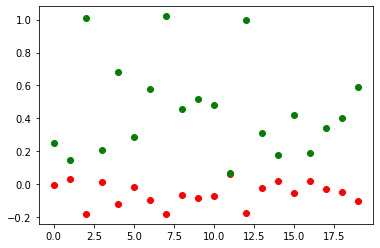

In [35]:
plt.scatter(range(20), results, c="r")
plt.scatter(range(20), y_test, c="g")
plt.show()
# This graph shows a pretty bad model

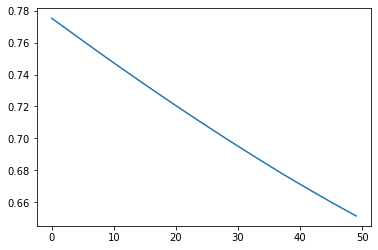

In [36]:
plt.plot(history.history["loss"])
plt.show()

### Let's increase the number of epochs from 50 to 500

In [38]:
history2 = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test))

Epoch 1/500
3/3 [==============================] - 0s 43ms/step - loss: 0.6494 - accuracy: 0.0000e+00 - val_loss: 0.5098 - val_accuracy: 0.0000e+00
Epoch 2/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6474 - accuracy: 0.0000e+00 - val_loss: 0.5078 - val_accuracy: 0.0000e+00
Epoch 3/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6453 - accuracy: 0.0000e+00 - val_loss: 0.5058 - val_accuracy: 0.0000e+00
Epoch 4/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6433 - accuracy: 0.0000e+00 - val_loss: 0.5038 - val_accuracy: 0.0000e+00
Epoch 5/500
3/3 [==============================] - 0s 23ms/step - loss: 0.6412 - accuracy: 0.0000e+00 - val_loss: 0.5018 - val_accuracy: 0.0000e+00
Epoch 6/500
3/3 [==============================] - 0s 22ms/step - loss: 0.6392 - accuracy: 0.0000e+00 - val_loss: 0.4999 - val_accuracy: 0.0000e+00
Epoch 7/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6372 - accuracy: 0.0000e+00 - val_loss

3/3 [==============================] - 0s 22ms/step - loss: 0.5525 - accuracy: 0.0000e+00 - val_loss: 0.4181 - val_accuracy: 0.0000e+00
Epoch 57/500
3/3 [==============================] - 0s 22ms/step - loss: 0.5510 - accuracy: 0.0000e+00 - val_loss: 0.4165 - val_accuracy: 0.0000e+00
Epoch 58/500
3/3 [==============================] - 0s 22ms/step - loss: 0.5495 - accuracy: 0.0000e+00 - val_loss: 0.4150 - val_accuracy: 0.0000e+00
Epoch 59/500
3/3 [==============================] - 0s 21ms/step - loss: 0.5480 - accuracy: 0.0000e+00 - val_loss: 0.4134 - val_accuracy: 0.0000e+00
Epoch 60/500
3/3 [==============================] - 0s 22ms/step - loss: 0.5465 - accuracy: 0.0000e+00 - val_loss: 0.4119 - val_accuracy: 0.0000e+00
Epoch 61/500
3/3 [==============================] - 0s 23ms/step - loss: 0.5449 - accuracy: 0.0000e+00 - val_loss: 0.4103 - val_accuracy: 0.0000e+00
Epoch 62/500
3/3 [==============================] - 0s 23ms/step - loss: 0.5434 - accuracy: 0.0000e+00 - val_loss: 0.40

Epoch 111/500
3/3 [==============================] - 0s 20ms/step - loss: 0.4514 - accuracy: 0.0000e+00 - val_loss: 0.3185 - val_accuracy: 0.0000e+00
Epoch 112/500
3/3 [==============================] - 0s 21ms/step - loss: 0.4487 - accuracy: 0.0000e+00 - val_loss: 0.3165 - val_accuracy: 0.0000e+00
Epoch 113/500
3/3 [==============================] - 0s 20ms/step - loss: 0.4459 - accuracy: 0.0000e+00 - val_loss: 0.3144 - val_accuracy: 0.0000e+00
Epoch 114/500
3/3 [==============================] - 0s 20ms/step - loss: 0.4430 - accuracy: 0.0000e+00 - val_loss: 0.3122 - val_accuracy: 0.0000e+00
Epoch 115/500
3/3 [==============================] - 0s 24ms/step - loss: 0.4401 - accuracy: 0.0000e+00 - val_loss: 0.3101 - val_accuracy: 0.0000e+00
Epoch 116/500
3/3 [==============================] - 0s 23ms/step - loss: 0.4371 - accuracy: 0.0000e+00 - val_loss: 0.3079 - val_accuracy: 0.0000e+00
Epoch 117/500
3/3 [==============================] - 0s 24ms/step - loss: 0.4342 - accuracy: 0.0000e

3/3 [==============================] - 0s 25ms/step - loss: 0.2121 - accuracy: 0.0000e+00 - val_loss: 0.2373 - val_accuracy: 0.0500
Epoch 222/500
3/3 [==============================] - 0s 28ms/step - loss: 0.2117 - accuracy: 0.0000e+00 - val_loss: 0.2371 - val_accuracy: 0.0500
Epoch 223/500
3/3 [==============================] - 0s 24ms/step - loss: 0.2112 - accuracy: 0.0000e+00 - val_loss: 0.2370 - val_accuracy: 0.0500
Epoch 224/500
3/3 [==============================] - 0s 31ms/step - loss: 0.2108 - accuracy: 0.0000e+00 - val_loss: 0.2370 - val_accuracy: 0.0500
Epoch 225/500
3/3 [==============================] - 0s 27ms/step - loss: 0.2104 - accuracy: 0.0000e+00 - val_loss: 0.2370 - val_accuracy: 0.0500
Epoch 226/500
3/3 [==============================] - 0s 24ms/step - loss: 0.2099 - accuracy: 0.0000e+00 - val_loss: 0.2367 - val_accuracy: 0.0500
Epoch 227/500
3/3 [==============================] - 0s 29ms/step - loss: 0.2095 - accuracy: 0.0000e+00 - val_loss: 0.2364 - val_accuracy:

3/3 [==============================] - 0s 25ms/step - loss: 0.1608 - accuracy: 0.0000e+00 - val_loss: 0.1782 - val_accuracy: 0.0500
Epoch 334/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1603 - accuracy: 0.0000e+00 - val_loss: 0.1777 - val_accuracy: 0.0500
Epoch 335/500
3/3 [==============================] - 0s 30ms/step - loss: 0.1598 - accuracy: 0.0000e+00 - val_loss: 0.1771 - val_accuracy: 0.0500
Epoch 336/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1592 - accuracy: 0.0000e+00 - val_loss: 0.1767 - val_accuracy: 0.0500
Epoch 337/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1587 - accuracy: 0.0000e+00 - val_loss: 0.1764 - val_accuracy: 0.0500
Epoch 338/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1582 - accuracy: 0.0000e+00 - val_loss: 0.1759 - val_accuracy: 0.0500
Epoch 339/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1577 - accuracy: 0.0000e+00 - val_loss: 0.1754 - val_accuracy:

3/3 [==============================] - 0s 22ms/step - loss: 0.0974 - accuracy: 0.0000e+00 - val_loss: 0.1041 - val_accuracy: 0.0500
Epoch 446/500
3/3 [==============================] - 0s 25ms/step - loss: 0.0968 - accuracy: 0.0000e+00 - val_loss: 0.1032 - val_accuracy: 0.0500
Epoch 447/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0961 - accuracy: 0.0000e+00 - val_loss: 0.1021 - val_accuracy: 0.0500
Epoch 448/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0955 - accuracy: 0.0000e+00 - val_loss: 0.1008 - val_accuracy: 0.0500
Epoch 449/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0950 - accuracy: 0.0000e+00 - val_loss: 0.0996 - val_accuracy: 0.0500
Epoch 450/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0943 - accuracy: 0.0000e+00 - val_loss: 0.0989 - val_accuracy: 0.0500
Epoch 451/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0937 - accuracy: 0.0000e+00 - val_loss: 0.0984 - val_accuracy:

In [39]:
results2 = model.predict(x_test)

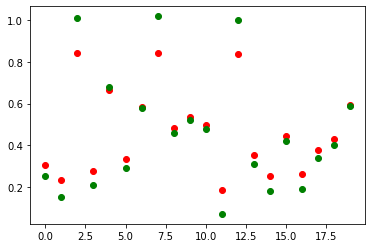

In [40]:
plt.scatter(range(20), results2, c="r")
plt.scatter(range(20), y_test, c="g")
plt.show()
# This graph shows improvement

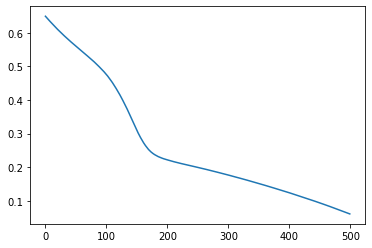

In [41]:
plt.plot(history2.history["loss"])
plt.show()

### Let's increase the number of epochs to 1000

In [42]:
history3 = model.fit(x_train, y_train, epochs = 1000, validation_data = (x_test, y_test))

Epoch 1/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0603 - accuracy: 0.0000e+00 - val_loss: 0.0603 - val_accuracy: 0.0500
Epoch 2/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0596 - accuracy: 0.0000e+00 - val_loss: 0.0596 - val_accuracy: 0.0500
Epoch 3/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0589 - accuracy: 0.0000e+00 - val_loss: 0.0590 - val_accuracy: 0.0500
Epoch 4/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0582 - accuracy: 0.0000e+00 - val_loss: 0.0583 - val_accuracy: 0.0500
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0575 - accuracy: 0.0000e+00 - val_loss: 0.0573 - val_accuracy: 0.0500
Epoch 6/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0567 - accuracy: 0.0000e+00 - val_loss: 0.0562 - val_accuracy: 0.0500
Epoch 7/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0560 - accuracy: 0.0000e+00 - val_loss: 0.0551 - val_ac

Epoch 57/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0290 - accuracy: 0.0000e+00 - val_loss: 0.0288 - val_accuracy: 0.0500
Epoch 58/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0289 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0500
Epoch 59/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0289 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 60/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0287 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 61/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0286 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 62/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0286 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 63/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0285 - accuracy: 0.0000e+00 - val_loss: 0.0286 -

Epoch 113/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0272 - accuracy: 0.0000e+00 - val_loss: 0.0282 - val_accuracy: 0.0500
Epoch 114/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0272 - accuracy: 0.0000e+00 - val_loss: 0.0282 - val_accuracy: 0.0500
Epoch 115/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0282 - val_accuracy: 0.0500
Epoch 116/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0282 - val_accuracy: 0.0500
Epoch 117/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0283 - val_accuracy: 0.0500
Epoch 118/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0283 - val_accuracy: 0.0500
Epoch 119/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 169/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0284 - val_accuracy: 0.0500
Epoch 170/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0284 - val_accuracy: 0.0500
Epoch 171/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 172/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 173/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 174/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 175/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 225/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0292 - val_accuracy: 0.0500
Epoch 226/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0291 - val_accuracy: 0.0500
Epoch 227/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0500
Epoch 228/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0288 - val_accuracy: 0.0500
Epoch 229/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0500
Epoch 230/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0500
Epoch 231/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 281/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0261 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 282/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0260 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0500
Epoch 283/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0260 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0500
Epoch 284/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0260 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 285/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0260 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 286/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0260 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 287/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0260 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 337/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0284 - val_accuracy: 0.0500
Epoch 338/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 339/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 340/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0287 - val_accuracy: 0.0500
Epoch 341/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 342/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 343/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0257 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 448/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0253 - accuracy: 0.0000e+00 - val_loss: 0.0279 - val_accuracy: 0.0500
Epoch 449/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0253 - accuracy: 0.0000e+00 - val_loss: 0.0279 - val_accuracy: 0.0500
Epoch 450/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0253 - accuracy: 0.0000e+00 - val_loss: 0.0280 - val_accuracy: 0.0500
Epoch 451/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0253 - accuracy: 0.0000e+00 - val_loss: 0.0282 - val_accuracy: 0.0500
Epoch 452/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0285 - val_accuracy: 0.0500
Epoch 453/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0286 - val_accuracy: 0.0500
Epoch 454/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 559/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0272 - val_accuracy: 0.0500
Epoch 560/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0272 - val_accuracy: 0.0500
Epoch 561/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0273 - val_accuracy: 0.0500
Epoch 562/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0249 - accuracy: 0.0000e+00 - val_loss: 0.0277 - val_accuracy: 0.0500
Epoch 563/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0249 - accuracy: 0.0000e+00 - val_loss: 0.0280 - val_accuracy: 0.0500
Epoch 564/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0283 - val_accuracy: 0.0500
Epoch 565/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 615/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0273 - val_accuracy: 0.0500
Epoch 616/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0500
Epoch 617/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0275 - val_accuracy: 0.0500
Epoch 618/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0276 - val_accuracy: 0.0500
Epoch 619/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0275 - val_accuracy: 0.0500
Epoch 620/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0500
Epoch 621/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 671/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0247 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0500
Epoch 672/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0247 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0500
Epoch 673/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0.0269 - val_accuracy: 0.0500
Epoch 674/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0500
Epoch 675/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 0.0000e+00 - val_loss: 0.0277 - val_accuracy: 0.0500
Epoch 676/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0247 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0500
Epoch 677/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 727/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0500
Epoch 728/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0500
Epoch 729/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0246 - accuracy: 0.0000e+00 - val_loss: 0.0266 - val_accuracy: 0.0500
Epoch 730/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0500
Epoch 731/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0500
Epoch 732/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0268 - val_accuracy: 0.0500
Epoch 733/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 783/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0270 - val_accuracy: 0.0500
Epoch 784/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0500
Epoch 785/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0270 - val_accuracy: 0.0500
Epoch 786/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0500
Epoch 787/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0266 - val_accuracy: 0.0500
Epoch 788/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0500
Epoch 789/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 839/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_accuracy: 0.0500
Epoch 840/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0500
Epoch 841/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0500
Epoch 842/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0267 - val_accuracy: 0.0500
Epoch 843/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0268 - val_accuracy: 0.0500
Epoch 844/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0269 - val_accuracy: 0.0500
Epoch 845/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0

Epoch 950/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0.0270 - val_accuracy: 0.0500
Epoch 951/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0241 - accuracy: 0.0000e+00 - val_loss: 0.0272 - val_accuracy: 0.0500
Epoch 952/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0240 - accuracy: 0.0000e+00 - val_loss: 0.0268 - val_accuracy: 0.0500
Epoch 953/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0500
Epoch 954/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0.0264 - val_accuracy: 0.0500
Epoch 955/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_accuracy: 0.0500
Epoch 956/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0

In [43]:
results3 = model.predict(x_test)

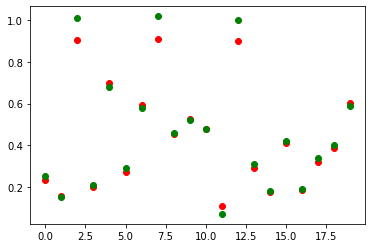

In [44]:
plt.scatter(range(20), results3, c="r")
plt.scatter(range(20), y_test, c="g")
plt.show()
# This model becomes very accurate

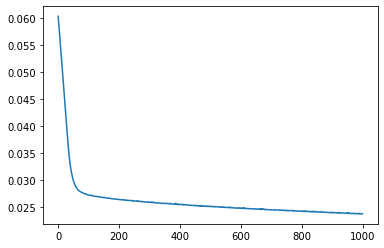

In [45]:
plt.plot(history3.history["loss"])
plt.show()